### Time Series decomposition 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
data = pd.read_table("data/airline-passengers.txt", sep=',', index_col='Month', header=0, parse_dates=True)

In [46]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


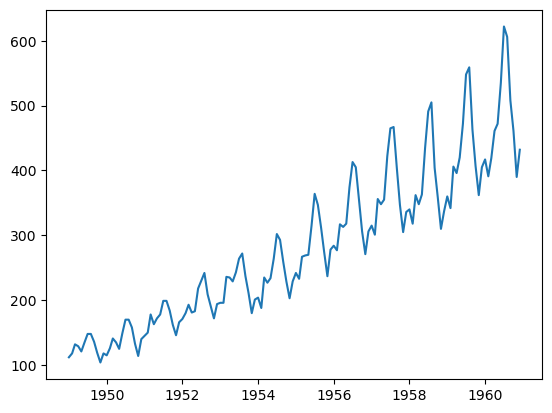

In [47]:
plt.plot(data['Passengers'])
plt.show()

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
result = seasonal_decompose(data, model='multiplicative')

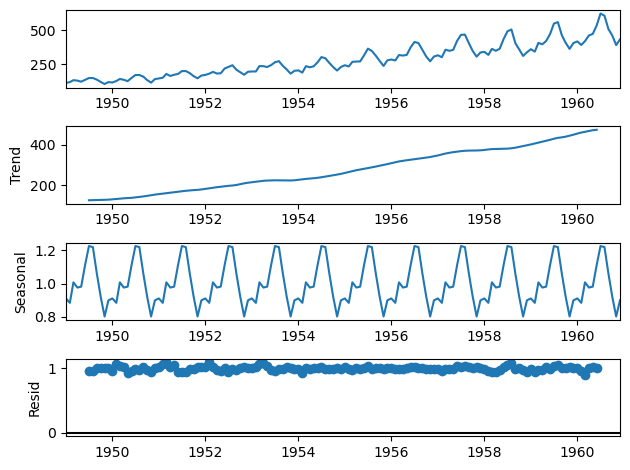

In [50]:
result.plot()
plt.show()

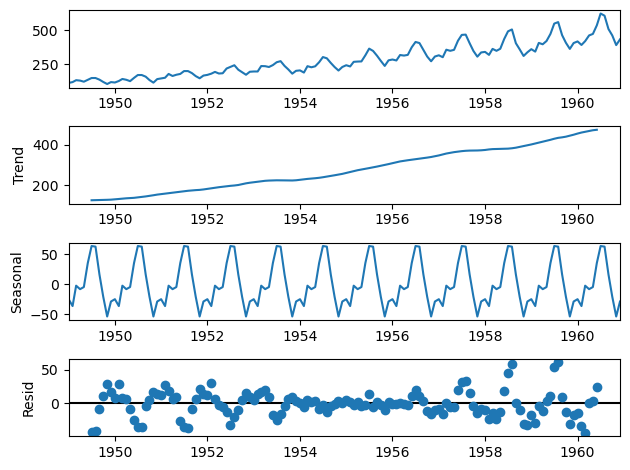

In [51]:
result = seasonal_decompose(data, model='additive')
result.plot()
plt.show()

### Finding ACF function 

In [53]:
from statsmodels.graphics.tsaplots import plot_acf

In [54]:
from statsmodels.tsa.stattools import acf

In [55]:
result = acf(data)

In [56]:
result

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

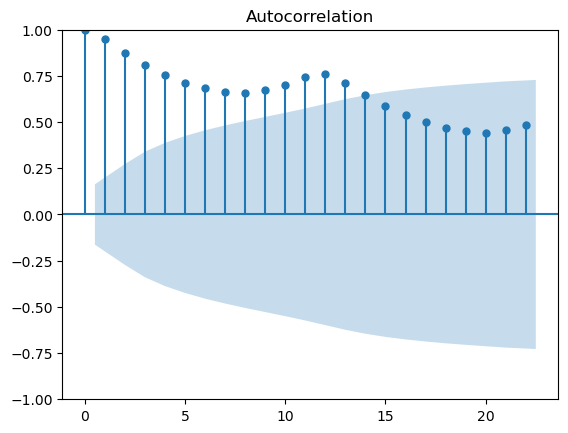

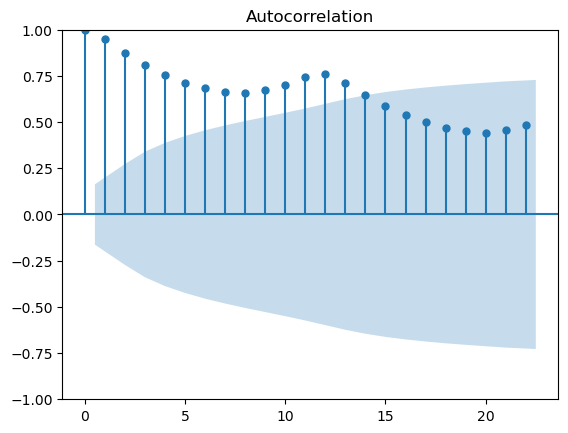

In [57]:
plot_acf(data)

### Calculate diffs and lags

In [58]:
data['diff'] = data['Passengers'].diff()

In [59]:
data.head()

,Passengers,diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


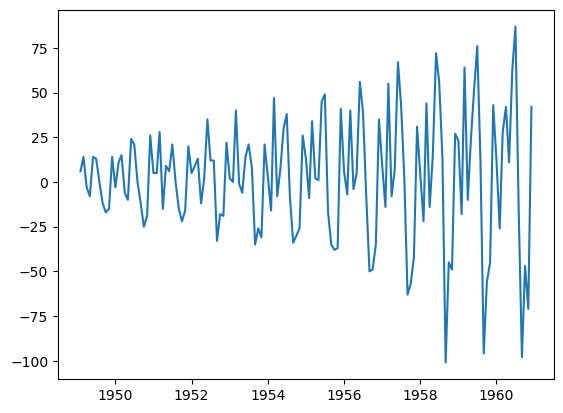

In [60]:
plt.plot(data['diff'])
plt.show()

In [61]:
data['lag'] = data['Passengers'].shift()

In [62]:
data.head()

,Passengers,diff,lag
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,112.0
1949-03-01,132,14.0,118.0
1949-04-01,129,-3.0,132.0
1949-05-01,121,-8.0,129.0


In [64]:
data['lag_2'] = data['Passengers'].shift(2)

In [65]:
data.head()

,Passengers,diff,lag,lag_2
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,112.0,NaN
1949-03-01,132,14.0,118.0,112.0
1949-04-01,129,-3.0,132.0,118.0
1949-05-01,121,-8.0,129.0,132.0
